In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample,shuffle
import pickle

In [64]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load the dataset
data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [66]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [67]:
data.shape

(3276, 10)

In [68]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [70]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [71]:
data.duplicated().any()

False

In [72]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [73]:
null_data = data.isnull().sum().reset_index()
null_data.columns=['column','Null_count']
null_data['%miss_value']= round(null_data['Null_count']/len(data),2)*100
null_data

,column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


<Axes: >

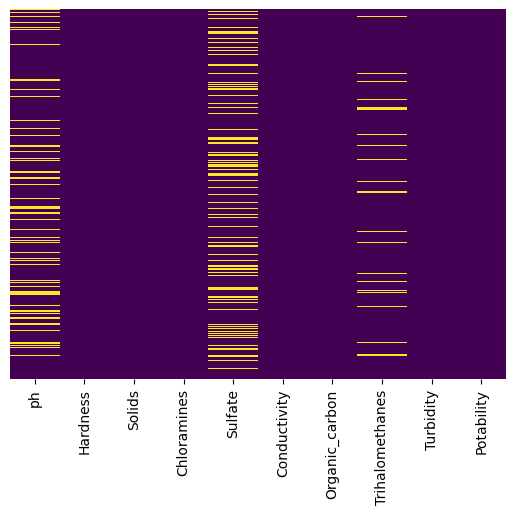

In [74]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: ylabel='Frequency'>

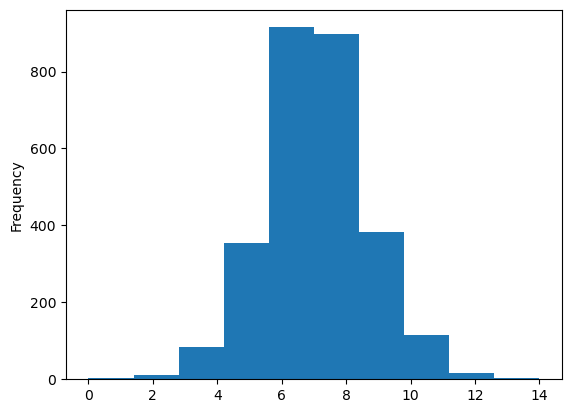

In [75]:
data['ph'].plot(kind ='hist')

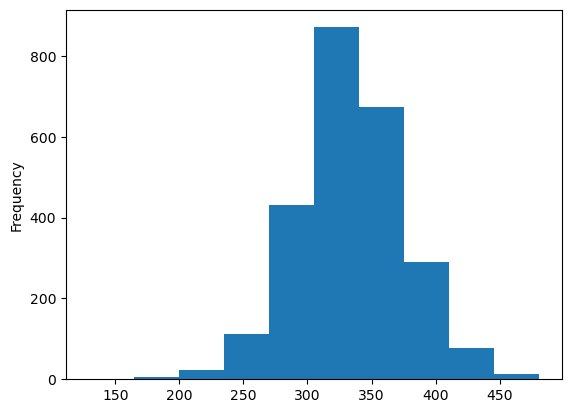

In [76]:
data['Sulfate'].plot(kind='hist')
plt.show()

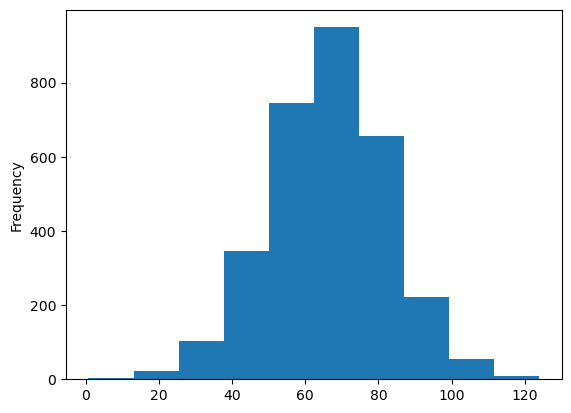

In [77]:
data['Trihalomethanes'].plot(kind='hist')
plt.show()

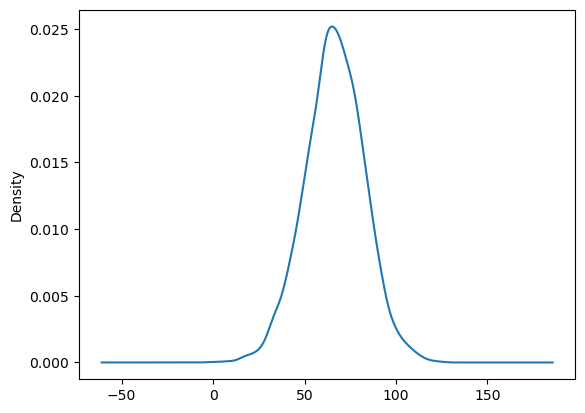

In [78]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Trihalomethanes'].plot(kind='kde',ax=ax)
plt.show()

In [79]:
# Handle missing values
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

In [80]:
# Handling class imbalance without SMOTE
ds_low = data[data['Potability'] == 1]
ds_high = data[data['Potability'] == 0]

ds_low_upsampled = resample(ds_low, 
                            replace=True,    # sample with replacement
                            n_samples=len(ds_high),  # to match majority class
                            random_state=42)
data = pd.concat([ds_low_upsampled, ds_high])

In [81]:
data = shuffle(data, random_state=42)

In [82]:
# Display the first few rows of the data
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
804,4.666148,171.288700,35680.067877,4.894374,314.613851,501.902864,14.210624,56.910254,4.556864,1
1658,6.090016,216.736232,12558.897973,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0
2046,6.504876,159.182139,13403.086389,6.958284,296.076914,359.974437,15.636850,63.514312,3.748443,1
2665,7.114387,196.533960,27022.708505,6.176786,333.775777,497.523605,18.704279,59.730438,3.762682,0
101,7.348845,223.264940,11519.046527,8.889559,333.775777,494.158434,18.145374,73.715522,4.880875,0


                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.043415 -0.041629     0.020958 -0.028861   
Hardness         0.043415  1.000000 -0.017587    -0.083345 -0.086945   
Solids          -0.041629 -0.017587  1.000000    -0.051000 -0.181820   
Chloramines      0.020958 -0.083345 -0.051000     1.000000 -0.000345   
Sulfate         -0.028861 -0.086945 -0.181820    -0.000345  1.000000   
Conductivity     0.011664 -0.036004  0.027485     0.006071 -0.021880   
Organic_carbon   0.030224  0.020248  0.007608    -0.016658  0.045351   
Trihalomethanes -0.000317 -0.007227 -0.016355     0.029751 -0.024346   
Turbidity       -0.015071 -0.012254  0.005720     0.011705 -0.032867   
Potability      -0.001206 -0.028245  0.029686     0.050852 -0.019919   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.011664        0.030224        -0.000317  -0.015071   
Hardness            -0.036004        0.020248        

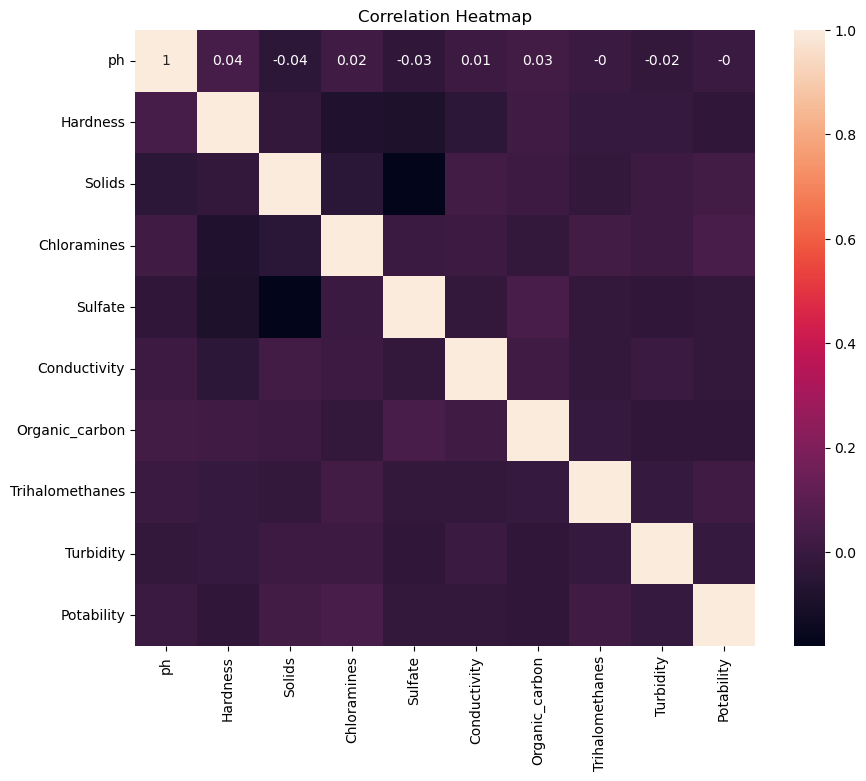

In [83]:
# Display the correlation matrix
ds_corr = data.corr()
print(ds_corr)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ds_corr.round(2), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [84]:
# Split data into features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Decision Tree Accuracy:  0.76875
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       372
           1       0.75      0.84      0.80       428

    accuracy                           0.77       800
   macro avg       0.77      0.76      0.76       800
weighted avg       0.77      0.77      0.77       800



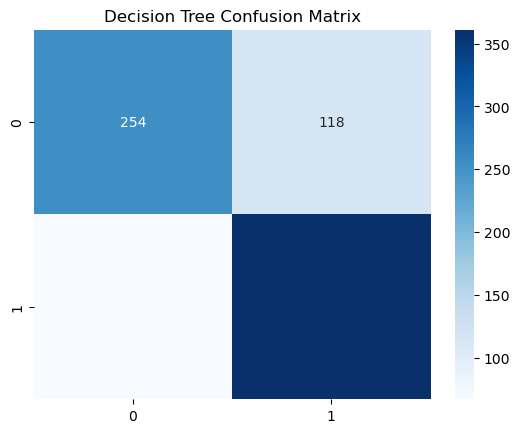

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=20, min_samples_split=2, random_state=42)

# Fit the model
dt.fit(X_train_pca, y_train)

# Make predictions
predictions_dt = dt.predict(X_test_pca)

# Print decision tree accuracy
print("Decision Tree Accuracy: ", accuracy_score(y_test, predictions_dt))

# Decision Tree - Classification report and confusion matrix
print("Decision Tree Classification Report:\n", classification_report(y_test, predictions_dt, zero_division=0))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Random Forest Accuracy:  0.87125
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       372
           1       0.88      0.87      0.88       428

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



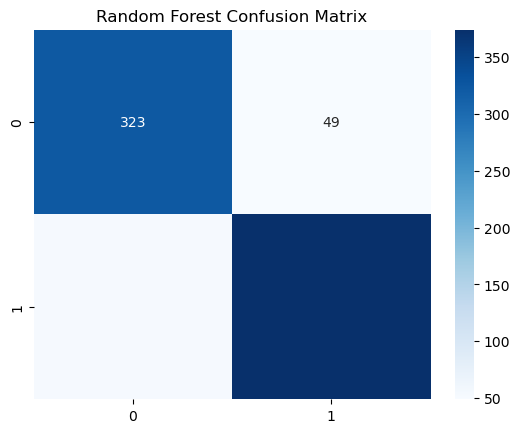

In [87]:
# Random Forest
rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf.fit(X_train_pca, y_train)
predictions_rf = rf.predict(X_test_pca)

# Print random forest accuracy
print("Random Forest Accuracy: ", accuracy_score(y_test, predictions_rf))

# Random Forest - Classification report and confusion matrix
print("Random Forest Classification Report:\n", classification_report(y_test, predictions_rf, zero_division=0))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [88]:

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Model saved to random_forest_model.pkl")


Model saved to random_forest_model.pkl


In [89]:


# Define the model or object you want to pickle
model = {'name': 'RandomForest', 'accuracy': 0.87, 'parameters': {'max_depth=20, min_samples_split=2, n_estimators=200, random_state=42'}}

# Save the model to a pickle file
with open(r'C:\Users\User\ml&dl\random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [90]:
import pickle

file_path = r"C:\Users\User\ml&dl\random_forest_model.pkl"

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("Model loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")


Model loaded successfully.


In [91]:
import pickle

file_path = r"C:\Users\User\ml&dl\random_forest_model.pkl"

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("Model loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")


Model loaded successfully.
